In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [35]:
#Загрузка нормализованного датасета
dataset_norm=pd.read_excel('General_norm.xlsx')
dataset_norm.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset_norm.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.248345,0.636932,0.476923,0.068893,0.638238,0.491617,0.177196,0.286882,0.724369,0.514688,0,0.270480,0.562467
1,0.248345,0.636932,0.476923,0.630260,0.421398,0.568710,0.177196,0.286882,0.724369,0.514688,0,0.349379,0.343805
2,0.453264,0.636932,0.486162,0.508465,0.509683,0.491617,0.177196,0.286882,0.724369,0.514688,0,0.349379,0.512007
3,0.452498,0.553147,0.482923,0.508465,0.509683,0.491617,0.177196,0.286882,0.724369,0.514688,0,0.349379,0.562467
4,0.408049,0.301792,0.521139,0.508465,0.509683,0.491617,0.177196,0.286882,0.724369,0.514688,0,0.349379,0.730669
5,0.406224,0.273863,0.344957,0.508465,0.509683,0.491617,0.321054,0.609464,0.223563,0.165674,0,0.507178,0.343805
6,0.629378,0.357648,0.574253,0.630260,0.421398,0.568710,0.321054,0.609464,0.223563,0.165674,0,0.507178,0.512007
7,0.623846,0.832430,0.918845,0.630260,0.421398,0.568710,0.854174,0.803013,0.307031,0.793899,0,0.507178,0.562467
8,0.486516,1.000000,0.602753,0.630260,0.421398,0.568710,0.854174,0.803013,0.307031,0.793899,0,0.507178,0.730669
9,0.190296,0.413505,0.534094,0.630260,0.421398,0.568710,0.397214,0.501937,0.497152,0.514688,0,0.664976,0.512007


In [36]:
# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(dataset_norm.loc[:, dataset_norm.columns != 'Соотношение матрица-наполнитель'],
                                                    dataset_norm['Соотношение матрица-наполнитель'], 
                                                    test_size = 0.3, 
                                                    random_state = 14)

In [37]:
x_train.shape

(620, 12)

In [38]:
y_train

163    0.641626
767    0.698197
103    0.329203
689    0.723380
270    0.573485
         ...   
327    0.303672
406    0.375587
268    0.632914
344    0.630833
619    0.282746
Name: Соотношение матрица-наполнитель, Length: 620, dtype: float64

In [39]:
x_test.shape

(266, 12)

In [40]:
y_test

522    0.438682
776    0.885481
117    0.577266
281    0.630380
468    0.410162
         ...   
273    0.330429
64     0.401156
680    0.571557
658    0.841668
72     0.664045
Name: Соотношение матрица-наполнитель, Length: 266, dtype: float64

In [43]:
# построение нейронной сети
model = Sequential() # тип нейронной сети
# количество слоёв и нейронов в каждом слое, функции активации
model.add(Dense(units=128, input_dim=12, activation='relu'))#указана размерность данных для первого слоя
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='softmax'))
#компиляция нейронной сети
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
#обучение нейронной сети
trayning_NN=model.fit(x_train,y_train,batch_size=128, epochs=50, verbose=1)


Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0016
Epoch 11/50
5/5 [======================

In [44]:
# статистика обучения для построения графика
trayning_NN.history

{'loss': [0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.30219539999961853,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.30219539999961853,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.30219539999961853,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.30219539999961853,
  0.3021954298019409,
  0.3021954298019409,
  0.30219539999961853,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.3021954298019409,
  0.302195429801940

In [45]:
#архитектура нейронной сети
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 55,361
Trainable params: 55,361
Non-trai

In [46]:
#тестирование нейронной сети
test_NN=model.evaluate(x_test, y_test, batch_size=128)


3/3 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.0000e+00


3/3 [==============================] - 0s 2ms/step


(0.0, 2.0)

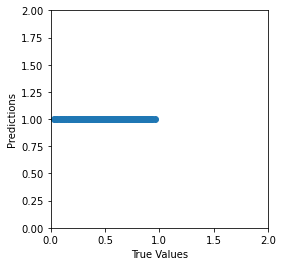

In [47]:
#тестирование нейронной сети с помощью предиктора
test_NN_prediction=model.predict(x_test,batch_size=128).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_test,test_NN_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)

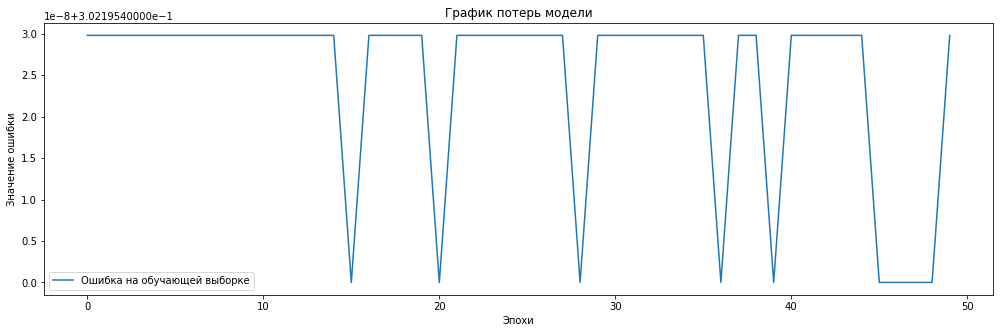

In [48]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
plt.figure(figsize = (17,5))
plt.plot(trayning_NN.history['loss'],
label = 'ошибка на обучающей выборке')
plt.title('График потерь модели')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи')
plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
plt.show()